# Machine Learning
## Programming Assignment 4: Logistic Regression

### Instructions:
The aim of this assignment is to give you hands-on experience with a real-life machine learning application. You will be using Logistic Regression classifier to predict digits based on their drawing.
You can only use the Python programming language and Jupyter Notebooks. Please use procedural programming style and comment your code thoroughly. There are two parts of this assignment. In part 1, you can use NumPy, Pandas, Matplotlib, and any other standard Python libraries. You are not allowed to use NLTK, scikit-learn, or any other machine learning toolkit. You can only use scikit-learn in part 2.

### Part 1: Implementing Logistic Regression classifier from scratch (75 marks)

You are not allowed to use scikit-learn or any other machine learning toolkit for this part. You have to implement your own Logistic Regression classifier from scratch. You may use Pandas, NumPy, Matplotlib, and other standard Python libraries.

#### Problem:
The purpose of this assignment is to get you familiar with the Logistic Regression classification. You are given the ‘MNIST’ dataset that contains around 60000 hand drawn digits. Your task is to implement the Logistic Regression classifier and use it for predicting the digits based on their drawing.


In [1]:
## Here are the libraries you will need for this part/
import pandas as pd
import numpy as np
import scipy.spatial as sc
import matplotlib.pyplot as plt
import re
import random
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler



#### Task 1.1: Dataset (5 points)
The MNIST digits dataset is a widely used benchmark dataset in the field of machine learning and computer vision. MNIST stands for Modified National Institute of Standards and Technology, which is the organization that collected and curated the dataset. The MNIST dataset consists of a collection of 60,000 handwritten digit images for training and an additional 10,000 images for testing. These images are grayscale and have a fixed size of 28x28 pixels. Each image represents a single handwritten digit ranging from 0 to 9.  Each image in the dataset is accompanied by its corresponding label, indicating the digit it represents. The labels are represented as integers from 0 to 9, matching the handwritten digit in the image. This labeling allows for supervised learning tasks, where algorithms can learn to classify and recognize handwritten digits based on the provided training examples.

#### Task 1.2: Data Preprocessing (10 points)

In the preprocessing step, you’re required to load the data, and scale the values using the StandardScalar function present in scikit-learn

In [2]:
# loading the dataset
data = pd.read_csv('./mnist_dataset.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#print the shape of the dataset
print("Shape of the dataset: ", data.shape)

Shape of the dataset:  (60000, 785)


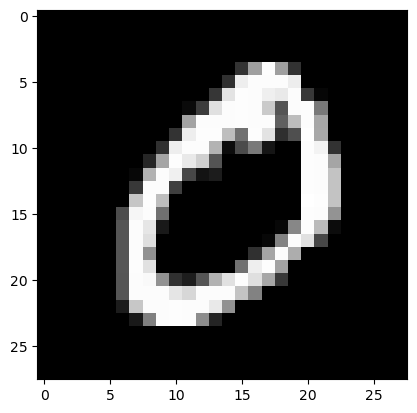

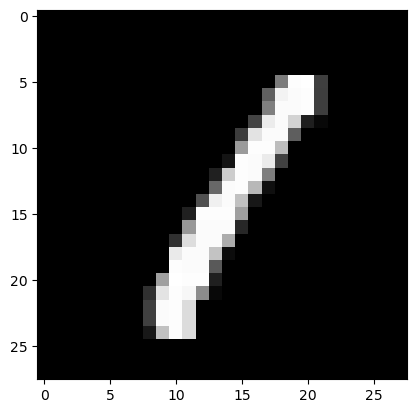

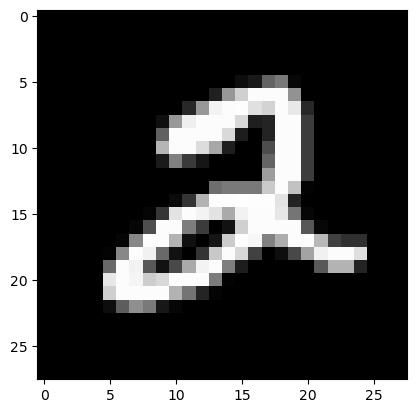

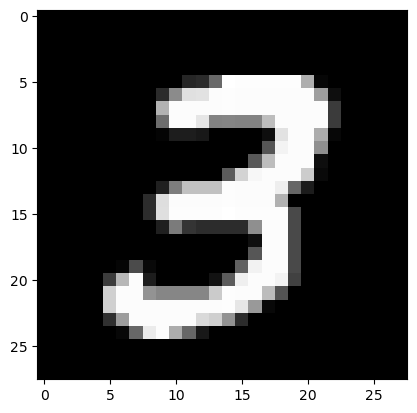

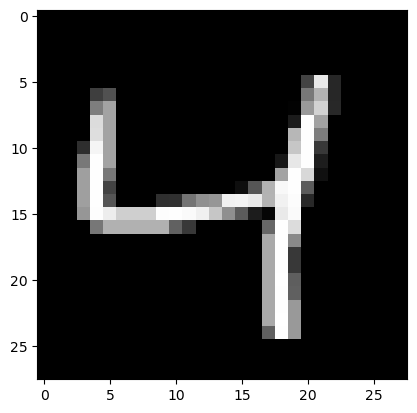

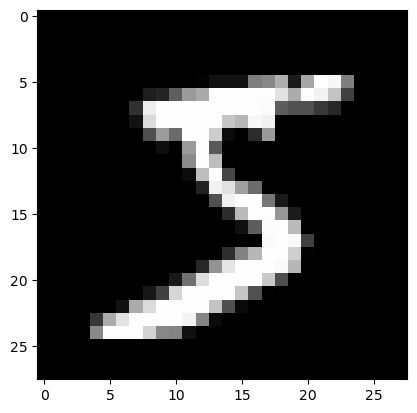

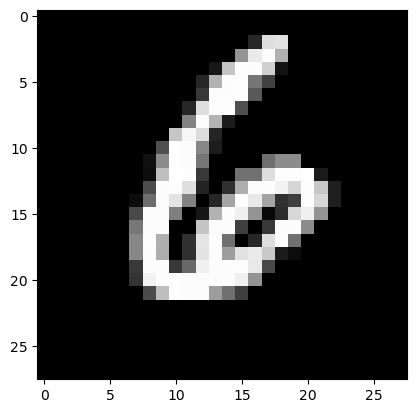

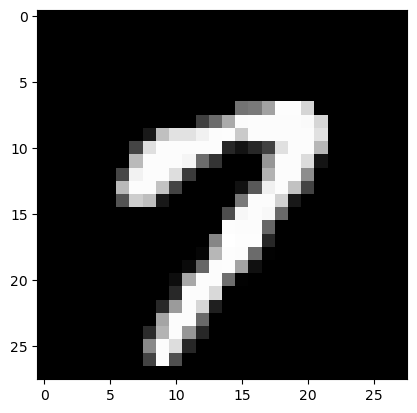

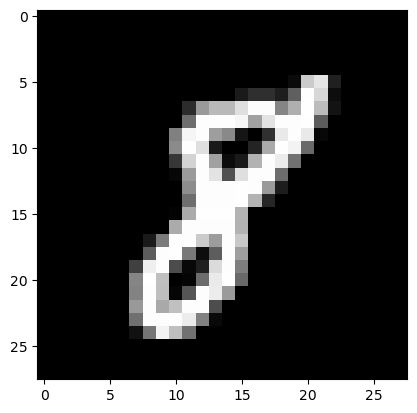

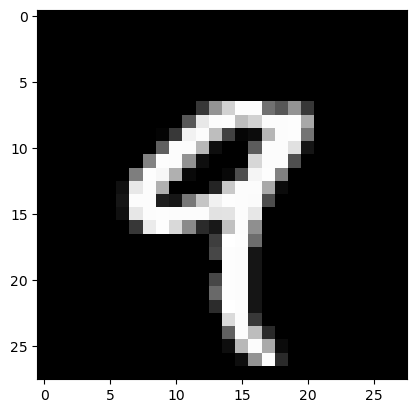

In [4]:
# write code which will take columns from dataset and print its image
num_classes =len(data['label'].unique())
def print_image(data, index):
    image = data.iloc[index,1:].values.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.show()

# print images of all labels
for i in range(num_classes):
    print_image(data, data[data['label'] == i].index[0]) # print image of label i



In [5]:
#describe the dataset
data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


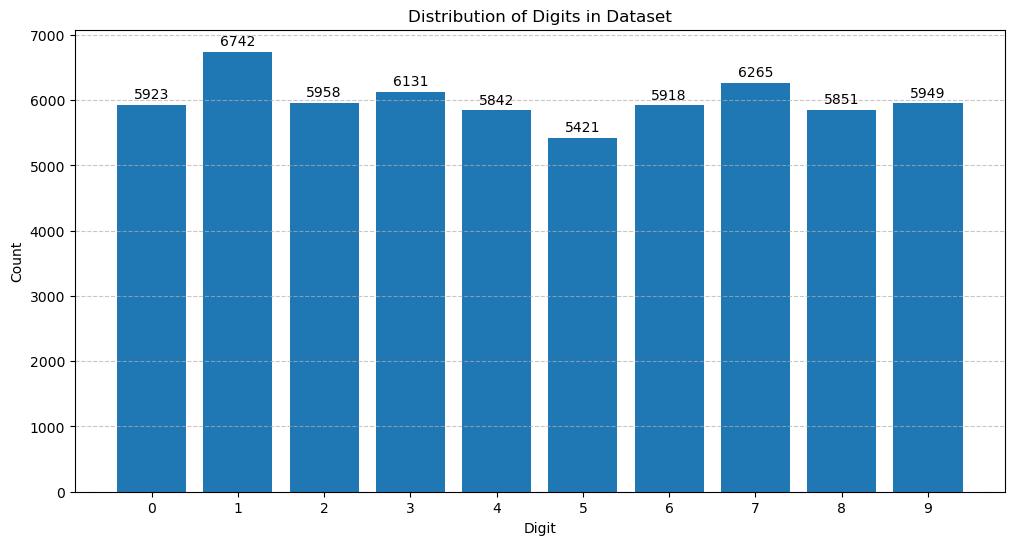

In [6]:
# plot the class distribution
plt.figure(figsize=(12, 6))
digit_counts = data['label'].value_counts().sort_index()
plt.bar(digit_counts.index, digit_counts.values)
plt.title('Distribution of Digits in Dataset')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of each bar
for i, count in enumerate(digit_counts.values):
    plt.text(i, count + 100, str(count), ha='center')

plt.show()

In [7]:
# scale the values using the StandardScalar function present in scikit-learn

# Separate features and labels
X = data.drop('label', axis=1)  # Features (all columns except 'label')
y = data['label']  # Labels

# Function to check if data is already scaled to avoid re-scaling the data
def is_data_scaled(X, threshold=0.1):
    """
    Check if data is approximately standardized
    Returns True if data appears to be scaled, False otherwise
    """
    means_centered = abs(X.mean(axis=0)).mean() < threshold  # Should be close to 0
    stds_unity = abs(X.std(axis=0).mean() - 1) < threshold  # Should be close to 1
    return means_centered and stds_unity

# Scale only if data is not already scaled
if not is_data_scaled(X):
    print("Scaling dataset...")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    data = pd.concat([y, X_scaled_df], axis=1)


# Verify the result 
print("\nShape of final dataset:", data.shape)


Scaling dataset...

Shape of final dataset: (60000, 785)


#### Task 1.3: Splitting the dataset (5 points)

In this part, divide the given dataset into training and testing sets using python.
Print out the sizes of the training dataset and test dataset, training data should contain 50000 images and test data should contain 10000 images. If your sizes are correct, you get full points.

In [8]:
# split the dataset into training and testing sets, training data s hould contain 50000 images and test data should contain 10000 images.
# split data using python function

def multinomial_train_test_split(data, train_size=50000, random_state=42):
    data = data.sample(frac=1, random_state=42).reset_index(drop=True)
    train_data = data.iloc[:train_size]
    test_data = data.iloc[train_size:]
    # split train and test data into features and labels    
    X_train = train_data.drop('label', axis=1)
    y_train = train_data['label']
    X_test = test_data.drop('label', axis=1)
    y_test = test_data['label']
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = multinomial_train_test_split(data)
# print X_train and y_train 
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (50000, 784)
y_train shape: (50000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


#### Task 1.4: Create Logistic Regression classifier (20 points)

Implement Multinomial Logistic Regression from scratch keeping in view all the discussions
from the lectures to classify the images into the 10 classes specified. Specifically, you’ll need to implement the
following: <br>
● Softmax function <br>
● Cross-entropy loss function (for multinomial logistic regression) <br>
● Batch Gradient Descent <br>
● Prediction function that predicts the label of test recordings using learned
multinomial logistic regression

In [9]:
# convert train and test data sets label for logistic regression in one vs all format
def convert_dataset(train_y, test_y, label):
    train_y = np.where(train_y == label, 1, 0)
    test_y = np.where(test_y == label, 1, 0)
    return train_y, test_y

In [10]:
# implement multinomial logistic regression class
# which has methods for sigmoid, softmax, cross entropy loss, batch gradient descent, prediction

class MultinomialLogisticRegression:
    def __init__(self, num_classes, num_features, learning_rate=0.01, epochs=1000):
        self.num_classes = num_classes
        self.num_features = num_features
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros((num_classes, num_features))
        self.bias = np.zeros(num_classes)
        self.tests = np.zeros((num_classes, num_features))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) 
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z))
    
    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        return -np.sum(y_true * np.log(y_pred))
    
    
    def fit(self, train_X, train_y):
        original_train_y = train_y.copy()
        for label in range(self.num_classes):
            # print(f"Training for label {label}")
            # convert dataset
            current_train_y, _ = convert_dataset(original_train_y, None, label)  # test_y unused in training
            # initialize weights and bias for each label
            self.weights[label] = np.zeros(self.num_features)
            self.bias[label] = 0
            m = train_X.shape[0]
            for _ in range(self.epochs):
                # compute logits 
                z = np.dot(train_X, self.weights[label]) + self.bias[label]
                # compute gradient
                y_pred = self.sigmoid(z)
                #update weights
                grad_weights = np.dot(train_X.T, (y_pred - current_train_y)) / m
                grad_bias = np.sum(y_pred - current_train_y) / m
                #store weights and bias for trained classified in self.weights and self.bias    
                self.weights[label] -= self.learning_rate * grad_weights
                self.bias[label] -= self.learning_rate * grad_bias
            # print(f"Training for label {label} completed")
            # print(f"Weights for label {label}: {self.weights[label]}")
            # print(f"Bias for label {label}: {self.bias[label]}")
        return self.weights, self.bias, self.tests
            
    def predict(self, test_X):
        # Initialize array to store probabilities for each class
        probabilities = np.zeros((test_X.shape[0], self.num_classes))        
        # Calculate probability for each class
        for label in range(self.num_classes):
            z = np.dot(test_X, self.weights[label]) + self.bias[label]
            probabilities[:, label] = self.sigmoid(z)
        
        # Return class with highest probability
        return np.argmax(probabilities, axis=1)

num_features = X_train.shape[1]
model = MultinomialLogisticRegression(num_classes, num_features, epochs=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
values, counts = np.unique(predictions, return_counts=True)

print("predictions", values)
print("counts", counts)


predictions [0 1 2 3 4 5 6 7 8 9]
counts [1029 1378  918  947  998  783 1039 1068  897  943]


#### Task 1.5: Implement evaluation functions (10 points)

Implement evaluation functions that calculates the:
- classification accuracy,
- F1 score,
- and the confusion matrix
of your classifier on the test set.


In [11]:

def accuracy_score(y_true, y_pred):
    """
    Calculate the accuracy score.
    
    Parameters:
    -----------
    y_true : array-like
        Ground truth (correct) labels.
    y_pred : array-like
        Predicted labels, as returned by a classifier.
        
    Returns:
    --------
    float
        The accuracy score.
    """
    return np.mean(y_true == y_pred)

def precision_recall_f1(y_true, y_pred, label):
    """
    Calculate precision, recall, and F1 score for a specific label.
    
    Parameters:
    -----------
    y_true : array-like
        Ground truth (correct) labels.
    y_pred : array-like
        Predicted labels, as returned by a classifier.
    label : int
        The label for which to calculate metrics.
        
    Returns:
    --------
    tuple
        (precision, recall, f1_score)
    """
    true_positives = np.sum((y_true == label) & (y_pred == label))
    false_positives = np.sum((y_true != label) & (y_pred == label))
    false_negatives = np.sum((y_true == label) & (y_pred != label))
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1

# calculate f1 score
def f1_score(y_true, y_pred, average='macro'):
    labels = np.unique(np.concatenate([y_true, y_pred]))
    f1_scores = []
    
    for label in labels:
        _, _, f1 = precision_recall_f1(y_true, y_pred, label)
        f1_scores.append(f1)
    
    if average == 'macro':
        return np.mean(f1_scores)
    else:
        raise ValueError("Only 'macro' averaging is supported")

# calculate confusion matrix
def confusion_matrix(y_true, y_pred):
    # Convert y_true from Series to array if it's a pandas Series
    if hasattr(y_true, 'values'):
        y_true = y_true.values
    if hasattr(y_pred, 'values'):
        y_pred = y_pred.values

    labels = np.unique(np.concatenate([y_true, y_pred]))
    n_labels = len(labels)
    
    # Create a mapping from label to index
    label_to_index = {label: i for i, label in enumerate(labels)}
    
    # Initialize confusion matrix
    cm = np.zeros((n_labels, n_labels), dtype=int)
    
    # Fill confusion matrix
    # Get the starting index of y_true
    start_idx = y_true.index.min() if hasattr(y_true, 'index') else 0
    
    # Iterate through y_true using its own indices
    for idx in range(len(y_true)):
        # print("value of idx", idx)
        # print("value of y_true", type(y_true))
        # print("predicted label", y_pred)
        # pass
        true_label = y_true[idx]
        pred_label = y_pred[idx]
        cm[label_to_index[true_label], label_to_index[pred_label]] += 1
    return cm

# evaluate classifier call all the functions
def evaluate_classifier(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    confusion = confusion_matrix(y_test, predictions)
    return accuracy, f1, confusion

# Evaluate the model
accuracy, f1, confusion = evaluate_classifier(model, X_test, y_test)
print("Accuracy: ", accuracy*100.00, "%")
print("F1 Score: ", f1*100.00, "%")
print("Confusion Matrix:")
print(confusion)


Accuracy:  86.65 %
F1 Score:  86.45825834447163 %
Confusion Matrix:
[[ 934    0    5    2    2    7   13    1    6    1]
 [   1 1128    5    1    3    3    3    4   10    1]
 [  15   48  819   18   18    1   41   18   29    9]
 [   4   25   37  800    5   24    8   22   19   15]
 [   2   23   10    0  851    8    7    4    8   41]
 [  20   12    4   63   22  697   27    6   31   15]
 [  24   17   18    1   11   17  928    0    3    0]
 [   6   30    7    4   11    0    1  929    1   49]
 [  13   85   10   33   15   24   11    7  787   20]
 [  10   10    3   25   60    2    0   77    3  792]]


#### Task 1.6: Cross Validation (15 points)

Use 5- fold cross-validation on your training data. (In cross-validation, you divide the training data set into 5 parts. 4 parts will be used for training and 1 part will be used for validation. Then you will take a different part of your data as a validation data set and train your algorithm on the rest of the data set.) Run your Logistic Regression function for this data for 5 learning rate values ranging from 0.001 and 0.01.

Run your evaluation function for each value of the learning rate, Report classification accuracy, F1 score, and confusion matrix.

Present the results as a graph with learning rate values on the x-axis and classification accuracy on the y-axis. Make another graph but with the F1 score on the y-axis this time. The graphs should be properly labelled.

accuracies [[0.7691, 0.7694, 0.7699, 0.7757, 0.7674], [0.8147, 0.8142, 0.8162, 0.819, 0.8122], [0.8295, 0.829, 0.8313, 0.8352, 0.8273], [0.8513, 0.8495, 0.852, 0.8559, 0.8517], [0.8639, 0.8643, 0.8657, 0.87, 0.8657]]
f1_scores [[0.7622790166694526, 0.7617957643062396, 0.7617886067516102, 0.7678150092580666, 0.7598221513951702], [0.809539191398763, 0.8094227239220106, 0.810734930040869, 0.813569539787584, 0.8074172432921873], [0.8251073852409283, 0.8250450597902022, 0.8266265313339384, 0.8306805693505288, 0.8232804161309959], [0.8480884460060827, 0.8460186543941621, 0.8487045284995179, 0.852517231063468, 0.848651226378214], [0.8613273364839825, 0.8616411686551931, 0.8632236941633119, 0.8674118021816408, 0.8633714143908676]]


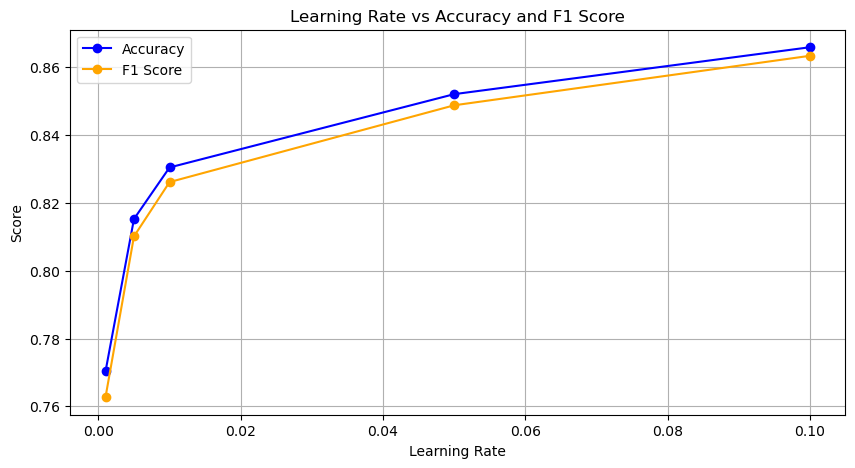

In [12]:
# implement 5-fold cross validation, 4 parts for training and 1 part for validation
# run the model for 5 learning rate values ranging from 0.001 and 0.01
# run the evaluation function for each value of the learning rate
# report the classification accuracy, F1 score, and confusion matrix
# make a graph with learning rate values on the x-axis and classification accuracy on the y-axis
# make another graph with the F1 score on the y-axis

## change value of epochs to lower value as it was taking too long with 1000 and 100 epochs.
## you can use 10 epochs for training
from sklearn.model_selection import train_test_split

def cross_validation(X_train, y_train, num_folds=5, learning_rates=[0.001, 0.005, 0.01, 0.05, 0.1]):
    # Initialize lists to store results
    accuracies = []
    f1_scores = []
    confusion_matrices = []

    for learning_rate in learning_rates:
        # print(f"Learning rate: {learning_rate}")
        fold_accuracies = []
        fold_f1_scores = []
        fold_confusion_matrices = []
        for fold in range(num_folds):
            # Split data into training and validation sets
            X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(
                X_train, y_train, test_size=0.2, random_state=fold
            )
            # Train the model on the training set
            model = MultinomialLogisticRegression(
                num_classes=10,
                num_features=X_train.shape[1],
                learning_rate=learning_rate, 
                epochs=100 # used 100 epochs for training as it was taking too long with 1000 epochs
            )
            # Train the model on the training set
            model.fit(X_train_fold, y_train_fold)
            # Make predictions on the validation set
            y_pred = model.predict(X_val_fold)
            # Calculate accuracy, F1 score, and confusion matrix
            accuracy = accuracy_score(y_val_fold, y_pred)
            f1 = f1_score(y_val_fold, y_pred, average='macro')
            confusion = confusion_matrix(y_val_fold, y_pred)
            
            # Store results
            fold_accuracies.append(accuracy)
            fold_f1_scores.append(f1)
            fold_confusion_matrices.append(confusion)
        # Store results
        accuracies.append(fold_accuracies)
        f1_scores.append(fold_f1_scores)
        confusion_matrices.append(fold_confusion_matrices)
    return accuracies, f1_scores, confusion_matrices

learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
accuracies, f1_scores, confusion_matrices = cross_validation(X_train, y_train, learning_rates=learning_rates)

print("accuracies", accuracies)
print("f1_scores", f1_scores)


# Calculate mean accuracies and F1 scores for each learning rate
mean_accuracies = [np.mean(acc) for acc in accuracies]
mean_f1_scores = [np.mean(f1) for f1 in f1_scores]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(learning_rates, mean_accuracies, marker='o', label='Accuracy', color='blue')
plt.plot(learning_rates, mean_f1_scores, marker='o', label='F1 Score', color='orange')

plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('Learning Rate vs Accuracy and F1 Score')
plt.legend()
plt.grid()
plt.show()

    

#### Task 1.7: Classification (10 points)

Finally, use the best value of the learning rate and run it on the test data set. Find the F1 score, classification accuracy, and confusion matrix and print them.

You accuracy should be above 80 and f1 score should be above 70 to get full points.

In [13]:
model = MultinomialLogisticRegression(
                num_classes=10,
                num_features=X_train.shape[1],
                learning_rate=0.1, 
                epochs=1000 # used 100 epochs for training as it was taking too long with 1000 epochs
            )
model.fit(X_train, y_train)
# Make predictions on the validation set
y_pred = model.predict(X_test)
# Calculate accuracy, F1 score, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
confusion = confusion_matrix(y_test, y_pred)

print("accuracy with learning rate 0.1 and epochs 1000", accuracy*100.00, "%")
print("f1_score with learning rate 0.1 and epochs 1000", f1*100.00, "%")

accuracy with learning rate 0.1 and epochs 1000 89.8 %
f1_score with learning rate 0.1 and epochs 1000 89.67926075561529 %


### Part 2:  Logistic Regression classifier using scikit-learn (25 points)

Use scikit-learn’s Logistic Regression implementation to train and test the logistic regression
on the provided dataset. Use scikit-learn’s accuracy_score function to calculate the accuracy
and confusion_matrix function to calculate confusion matrix on the test set.
To get full marks, the accuracy score, classification reports and confusion matrix must be shown for values for accuracy and F1 should be similar to those obtained in the previous part.

In [14]:
# Here are the libraries and specific functions you will be needing for this part

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

# implement logistic regression using scikit-learn
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Make predictions on the validation set
y_pred = model.predict(X_test)
# Calculate accuracy, F1 score, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
confusion = confusion_matrix(y_test, y_pred)

print("accuracy with scikit-learn", accuracy)
print("f1_score with scikit-learn", f1)

accuracy with scikit-learn 0.9106
f1_score with scikit-learn 0.9093466430514944
